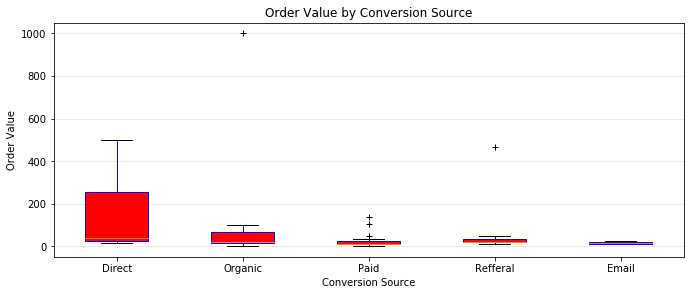

In [1]:
#just another way to do above but not in colour

### import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab

# import the data from csv
file="Data/shopify_conversion_paths.csv"
Conversions=pd.read_csv(file, encoding = "ISO-8859-1",sep=',')

# filter by source
Direct=Conversions[Conversions["first visit"]=="direct"]
Organic=Conversions[Conversions["first visit"]=="google"]
CPC=Conversions[Conversions["first visit"]=="google (paid)"]
Referral=Conversions[Conversions["first visit"]=="balticmill.com"]
Email=Conversions[Conversions["first visit"]=="email"]

# sort by order Value
Sorted=Conversions.sort_values(['order value'], ascending=[False])
DirectSorted=Direct.sort_values(['order value'], ascending=[False])
OrganicSorted=Organic.sort_values(['order value'], ascending=[False])
CPCSorted=CPC.sort_values(['order value'], ascending=[False])
ReferralSorted=Referral.sort_values(['order value'], ascending=[False])
EmailSorted=Email.sort_values(['order value'], ascending=[False])

# print((Sorted)['Order Value'])
Directbox=DirectSorted['order value'].values.tolist()
Organicbox=OrganicSorted['order value'].values.tolist()
CPCbox=CPCSorted['order value'].values.tolist()
Referralbox=ReferralSorted['order value'].values.tolist()
Emailbox=EmailSorted['order value'].values.tolist()

data = [Directbox, Organicbox,CPCbox,Referralbox,Emailbox]
alldata = np.array([[Directbox],[Organicbox],[CPCbox],[Referralbox],[EmailSorted]])

fig, ax1 = plt.subplots(figsize=(10, 5))
fig.canvas.set_window_title('Order Value by Conversion Source')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5,patch_artist=True, labels=['Direct', 'Organic', 'Paid', 'Refferal', 'Email'])
plt.setp(bp['boxes'], color='blue')
plt.setp(bp['boxes'], facecolor= 'red')
plt.setp(bp['whiskers'], color='blue')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major',color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Order Value by Conversion Source')
ax1.set_xlabel('Conversion Source')
ax1.set_ylabel('Order Value')
        
# print plots
# pylab.savefig('Graphs/boxplot.png')   # save the figure to file
# pylab.savefig('Graphs/boxplot.pdf') # savefig('salesdistribution.pdf')
plt.show()

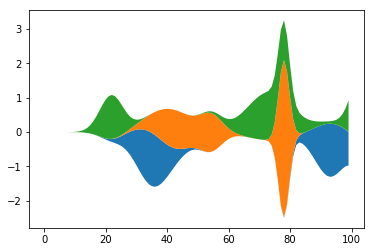

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)


def layers(n, m):
    """
    Return *n* random Gaussian mixtures, each of length *m*.
    """
    def bump(a):
        x = 1 / (.1 + np.random.random())
        y = 2 * np.random.random() - .5
        z = 10 / (.1 + np.random.random())
        for i in range(m):
            w = (i / float(m) - y) * z
            a[i] += x * np.exp(-w * w)
    a = np.zeros((m, n))
    for i in range(n):
        for j in range(5):
            bump(a[:, i])
    return a

d = layers(3, 100)

plt.subplots()
plt.stackplot(range(100), d.T, baseline='wiggle')
plt.show()

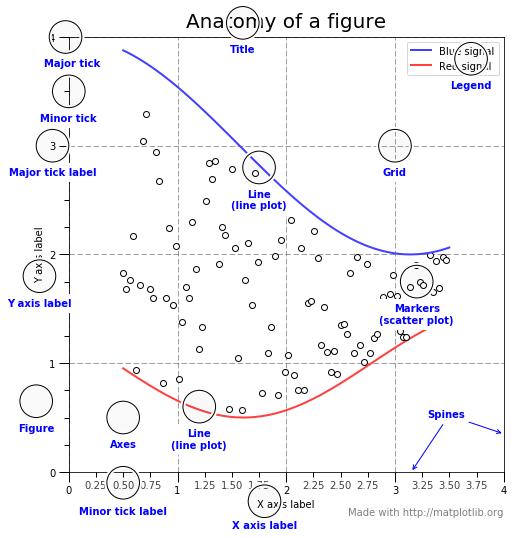

In [1]:
# This figure shows the name of several matplotlib elements composing a figure

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

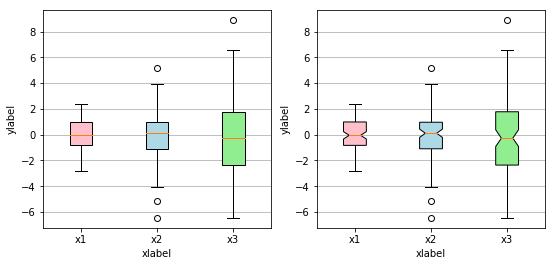

In [2]:
"""
=================================
Box plots with custom fill colors
=================================

This plot illustrates how to create two types of box plots
(rectangular and notched), and how to fill them with custom
colors by accessing the properties of the artists of the
box plots. Additionally, the ``labels`` parameter is used to
provide x-tick labels for each sample.

A good general reference on boxplots and their history can be found
here: http://vita.had.co.nz/papers/boxplots.pdf
"""

import matplotlib.pyplot as plt
import numpy as np

# Random test data
np.random.seed(123)
all_data = [np.random.normal(0, std, 100) for std in range(1, 4)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))], )
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])

plt.show()